In [1]:
import matplotlib.pyplot as plt
import torch
import pandas as pd
import seaborn as sns

sns.set(style="whitegrid")

In [9]:
def spectral_norm_svd(A: torch.Tensor) -> float:
    # return torch.linalg.matrix_norm(A, ord=2)
    return torch.linalg.svdvals(A.to(torch.float32)).max()

def expected_operator_norm(A: torch.Tensor, samples: int = 10) -> float:
    n = A.shape[1]
    total = 0.0
    for _ in range(samples):
        x = torch.randn(n, 1)
        Ax = A @ x 
        total += torch.norm(Ax / ( x.norm() ), 2).item()
    return total / samples

In [ ]:
rows = []

factors = [i for i in range(1, 211) if 210 % i == 0]
head_size = 10
n = 210 * head_size

samples = 60

for factor in factors:
    r = n // factor // head_size

    for s in range(samples):
        A = torch.randn(head_size * factor, n)
        x = torch.randn(n, 1)

        Ax = A @ x 

        catted = torch.cat([Ax] * r, dim=0)
        # ||\,A^\oplus x\,||_2 \leqslant ||\,A^\oplus \,||_E * ||\,x\,||_2

        spec_norm_catted = torch.norm(catted / (n**0.5 * r**(0.5)), 2).item()
        op_norm_catted = torch.norm(catted / (n**0.5), 2).item() 

        for (name, val) in {
            # "spec_norm": spec_norm.item(),
            "spec_norm_predicted": spec_norm_catted,
            "op_norm_predicted": op_norm_catted,
        }.items():
            # if name == "op_norm_predicted":
            #     continue
            rows.append({
                'r': r,
                'type': name,
                'value': val,
                'seed': s,
            })

In [5]:
df = pd.DataFrame(rows)

/mnt/weka/home/kyle.chickering/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  func(*plot_args, **plot_kwargs)


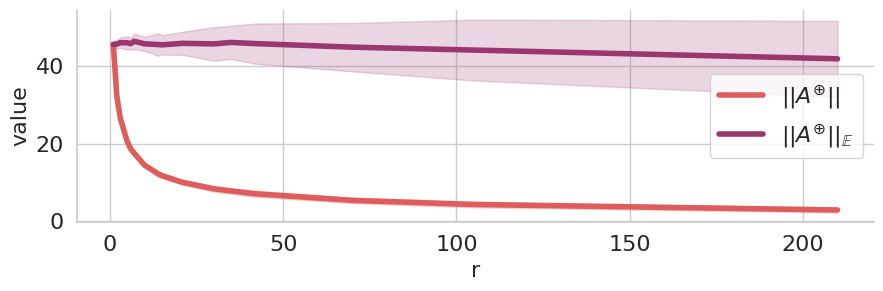

In [13]:
font_size = 16  # You can adjust this value

p = sns.relplot(
    data=df,
    x='r',
    y='value',
    hue='type',
    aspect=3.0,
    height=3,
    kind='line',
    palette='flare',
    linewidth=4.0,
    ci='sd',
)

p._legend.remove()

# Update legend labels with mathematical notation
legend_labels = {
    'spec_norm_predicted': r'$||A^{\oplus}||$',
    'op_norm_predicted': r'$||A^{\oplus}||_{\mathbb{E}}$'
}

# Get current legend handles and labels
handles, labels = p.axes.flat[0].get_legend_handles_labels()

# Map old labels to new ones
new_labels = [legend_labels.get(label, label) for label in labels]

# Update the legend
p.axes.flat[0].legend(handles, new_labels, fontsize=font_size)

# Set font size for other plot elements
p.set_axis_labels('r', 'value', fontsize=font_size)
p.fig.suptitle('', fontsize=font_size)  # Add title if needed
p.axes.flat[0].tick_params(labelsize=font_size)

plt.savefig("expected_norms.pdf", bbox_inches='tight', dpi=300)


In [151]:
# compute all factors of 210
factors = [i for i in range(1, 211) if 210 % i == 0]

In [5]:
factors

[1, 2, 3, 5, 6, 7, 10, 14, 15, 21, 30, 35, 42, 70, 105, 210]

In [7]:
n

2100

## More Experiments

In [11]:
rows = []

factors = [i for i in range(1, 211) if 210 % i == 0]
head_size = 4
n = 210 * head_size

samples = 10

for factor in factors:
    r = n // factor // head_size

    for s in range(samples):
        A = torch.randn(head_size * factor, n)

        catted = torch.cat([A] * r, dim=0)
        spec_norm_catted = spectral_norm_svd(catted) / n**0.5
        eon_catted = expected_operator_norm(catted, samples=10) / n**0.5

        # x = torch.randn(n, 1)

        # Ax = A @ x 

        # catted = torch.cat([Ax] * r, dim=0)

        # spec_norm_catted = torch.norm(catted / (n**0.5 * r**(0.5)), 2).item()
        # op_norm_catted = torch.norm(catted / (n**0.5), 2).item() 

        for (name, val) in {
            # "spec_norm": spec_norm.item(),
            "spec_norm_cat": spec_norm_catted.item(),
            "ex_op_norm_cat": eon_catted,
        }.items():
            # if name == "op_norm_predicted":
            #     continue
            rows.append({
                'r': r,
                'type': name,
                'value': val,
                'seed': s,
            })

In [12]:
df = pd.DataFrame(rows)

/mnt/weka/home/kyle.chickering/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  func(*plot_args, **plot_kwargs)


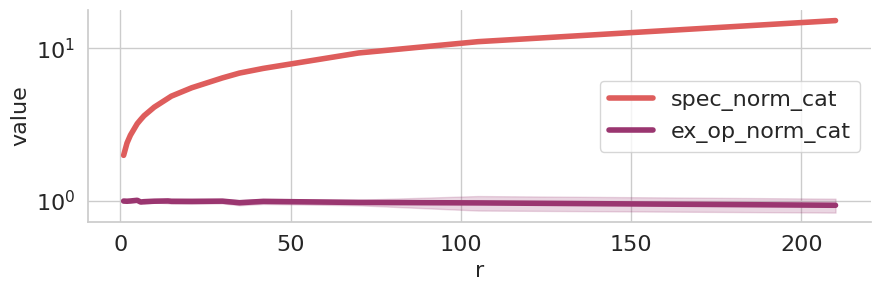

In [14]:
font_size = 16  # You can adjust this value

p = sns.relplot(
    data=df,
    x='r',
    y='value',
    hue='type',
    aspect=3.0,
    height=3,
    kind='line',
    palette='flare',
    linewidth=4.0,
    ci='sd',
)
p.set(yscale="log")

p._legend.remove()

# Update legend labels with mathematical notation
legend_labels = {
    'spec_norm_predicted': r'$||A^{\oplus}||$',
    'op_norm_predicted': r'$||A^{\oplus}||_{\mathbb{E}}$'
}

# Get current legend handles and labels
handles, labels = p.axes.flat[0].get_legend_handles_labels()

# Map old labels to new ones
new_labels = [legend_labels.get(label, label) for label in labels]

# Update the legend
p.axes.flat[0].legend(handles, new_labels, fontsize=font_size)

# Set font size for other plot elements
p.set_axis_labels('r', 'value', fontsize=font_size)
p.fig.suptitle('', fontsize=font_size)  # Add title if needed
p.axes.flat[0].tick_params(labelsize=font_size)

plt.savefig("expected_norms.pdf", bbox_inches='tight', dpi=300)